In [1]:
print('Hello world')

Hello world


In [ ]:
#https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca
#https://www.kaggle.com/julianjose/minute-weather
#https://towardsdatascience.com/10-tips-for-choosing-the-optimal-number-of-clusters-277e93d72d92

In [27]:
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [5]:
FULL_PATH_RAW_DATA = "data/minute_weather.csv"

In [6]:
df_weather_RAW = pd.read_csv(FULL_PATH_RAW_DATA)
df_weather_RAW

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
6,6,2011-09-10 00:06:49,912.3,62.78,79.0,2.4,89.0,2.7,62.0,2.0,0.0,0.0,65.6
7,7,2011-09-10 00:07:49,912.3,62.42,86.0,2.0,92.0,2.4,75.0,1.8,0.0,0.0,65.2
8,8,2011-09-10 00:08:49,912.3,62.24,105.0,1.4,125.0,1.9,82.0,1.0,0.0,0.0,65.8
9,9,2011-09-10 00:09:49,912.3,62.24,93.0,0.4,126.0,0.7,14.0,0.2,0.0,0.0,58.6


In [29]:
df_weather_WIP = df_weather_RAW[['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 'max_wind_speed', 'min_wind_direction', 'min_wind_speed', 'rain_accumulation', 'rain_duration', 'relative_humidity']]




df_weather_WIP = df_weather_WIP.fillna(df_weather_WIP.mean())
df_weather_WIP = (df_weather_WIP - df_weather_WIP.mean()) / df_weather_WIP.mean()
#df_weather_WIP

df_weather_WIP = df_weather_WIP.iloc[0: 3000]

X = StandardScaler().fit_transform(df_weather_WIP)

k_means = KMeans(n_clusters = 6)
#Run the clustering algorithm
model = k_means.fit(X)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X)
y_hat

array([3, 1, 1, ..., 1, 1, 1])

In [40]:
sum_of_squared_distances = []
silhouette_score = []
calinski_harabasz_score = []
K = range(2,15)
for k in K:
    k_means = KMeans(n_clusters = k)
    model = k_means.fit(X)
    y = k_means.predict(X)
    labels = k_means.labels_
    sum_of_squared_distances.append(k_means.inertia_)
    
    silhouette_score.append(metrics.silhouette_score(X, labels, metric = 'euclidean'))
    calinski_harabasz_score.append(metrics.calinski_harabasz_score(X, labels))

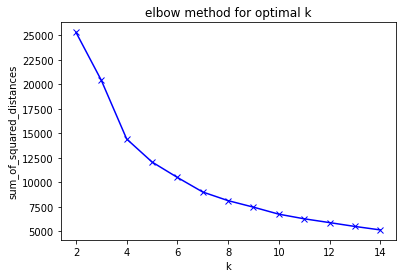

In [41]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()



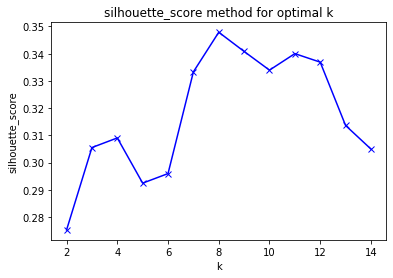

In [42]:
plt.plot(K, silhouette_score, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('silhouette_score method for optimal k')
plt.show()



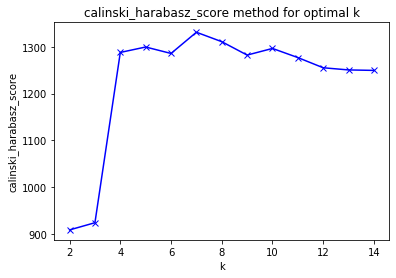

In [43]:
plt.plot(K, calinski_harabasz_score, 'bx-')
plt.xlabel('k')
plt.ylabel('calinski_harabasz_score')
plt.title('calinski_harabasz_score method for optimal k')
plt.show()